# **Preparing to Plot**

## **Loading data_dict**      from **pickle**

In [15]:
# Load "ib970mrn_grp1" from pickle
import pickle
with open("ib970mrn_grp1.pkl", "rb") as f:
    ib970mrn_grp1 = pickle.load(f) 


In [16]:
# Load "ib970mrn_grp1_nrml" from pickle
import pickle
with open("ib970mrn_grp1_nrml.pkl", "rb") as f:
    ib970mrn_grp1_nrml = pickle.load(f)


In [17]:
# Show the list of values by removing "comment mark"
# ib970mrn_grp1_nrml

In [18]:
import sys
print(sys.executable)



/home/bhuns/miniconda3/bin/python


## **Creating the plot functions**

### 🧩 Option 0: plot_all_columns_over_time¶

In [19]:
# def plot_all_columns_over_time(data_dict, timestamp_col="Cleaned_Timestamp"):

import pandas as pd
import matplotlib.pyplot as plt

def plot_all_columns_over_time(data_dict, timestamp_col="Cleaned_Timestamp"):
    """
    Loops through all non-timestamp columns in a dict and plots each one over time.

    Parameters:
    - data_dict: dict — source dictionary with column names as keys
    - timestamp_col: str — name of the timestamp column
    """
    # Step 1: Convert to DataFrame
    df = pd.DataFrame(data_dict)

    # Step 2: Validate timestamps
    df[timestamp_col] = pd.to_datetime(df[timestamp_col], errors="coerce")
    df = df.dropna(subset=[timestamp_col])
    df = df.sort_values(timestamp_col)

    # Step 3: Loop through value columns
    for col in df.columns:
        if col == timestamp_col:
            continue  # skip timestamp column

        # Drop rows with missing values in this column
        df_plot = df[[timestamp_col, col]].dropna()

        # Plot
        plt.figure(figsize=(10, 5))
        plt.plot(df_plot[timestamp_col], df_plot[col], marker='o', linestyle='-', color='teal')
        plt.xlabel("Timestamp")
        plt.ylabel(col)
        plt.title(f"Morning {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.grid(True)
        plt.show()


### 🧩 Option 1: Plot All Columns on a Single Figure

In [20]:
def plot_all_columns_together(data_dict, timestamp_col="Cleaned_Timestamp"):
    import pandas as pd
    import matplotlib.pyplot as plt

    df = pd.DataFrame(data_dict)
    df[timestamp_col] = pd.to_datetime(df[timestamp_col], errors="coerce")
    df = df.dropna(subset=[timestamp_col])
    df = df.sort_values(timestamp_col)

    plt.figure(figsize=(12, 6))
    for col in df.columns:
        if col == timestamp_col:
            continue
        plt.plot(df[timestamp_col], df[col], marker='o', linestyle='-', label=col)

    plt.xlabel("Timestamp")
    plt.ylabel("Value")
    plt.title("Multi-column Time Series")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

    


### 🧩 Option 2: Grouped Subplots (One Figure, Multiple Panels)

In [21]:
def plot_all_columns_subplots(data_dict, timestamp_col="Cleaned_Timestamp"):
    import pandas as pd
    import matplotlib.pyplot as plt

    df = pd.DataFrame(data_dict)
    df[timestamp_col] = pd.to_datetime(df[timestamp_col], errors="coerce")
    df = df.dropna(subset=[timestamp_col])
    df = df.sort_values(timestamp_col)

    value_cols = [col for col in df.columns if col != timestamp_col]
    n = len(value_cols)

    fig, axes = plt.subplots(n, 1, figsize=(12, 4 * n), sharex=True)
    if n == 1:
        axes = [axes]  # ensure iterable

    for ax, col in zip(axes, value_cols):
        df_plot = df[[timestamp_col, col]].dropna()
        ax.plot(df_plot[timestamp_col], df_plot[col], marker='o', linestyle='-', color='teal')
        ax.set_ylabel(col)
        ax.set_title(f"Morning {col}")
        ax.grid(True)

    plt.xlabel("Timestamp")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [22]:
def plot_column_groups(data_dict, plt_grps, timestamp_col="Cleaned_Timestamp"):
    import pandas as pd
    import matplotlib.pyplot as plt

    df = pd.DataFrame(data_dict)
    df[timestamp_col] = pd.to_datetime(df[timestamp_col], errors="coerce")
    df = df.dropna(subset=[timestamp_col])
    df = df.sort_values(timestamp_col)

    for grp in plt_grps:
        plt.figure(figsize=(12, 6))
        for col in grp:
            if col not in df.columns:
                print(f"Warning: {col} not found in data.")
                continue
            df_plot = df[[timestamp_col, col]].dropna()
            plt.plot(df_plot[timestamp_col], df_plot[col], marker='o', linestyle='-', label=col)

        plt.xlabel("Timestamp")
        plt.ylabel("Value")
        plt.title(f"Group Plot: {', '.join(grp)}")
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.grid(True)
        plt.show()


## 🧩 Setting up **plt_grps_dict**

## Assembling **plot_grps** *for* **plt_grps_dict**

### Available **data_cols_nms** List of "ib970mrn_grp1" key_nms

In [23]:
plt_grps = [
    ["89. ICW of Trunk", "92. ICW of Right Leg", "21. ICW (Intracellular Water)"],
    ["24. ECW (Extracellular Water", "104. ECW of Trunk"],
    ["132. BMR (Basal Metabolic Rate)", "160. 50kHz-Whole Body Phase Angle"
    ]
]

# **Plots** 

## **plot_column_groups(ib970mrn_grp1_nrml, plt_grps)** 

/tmp/ipykernel_1626/3593075949.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


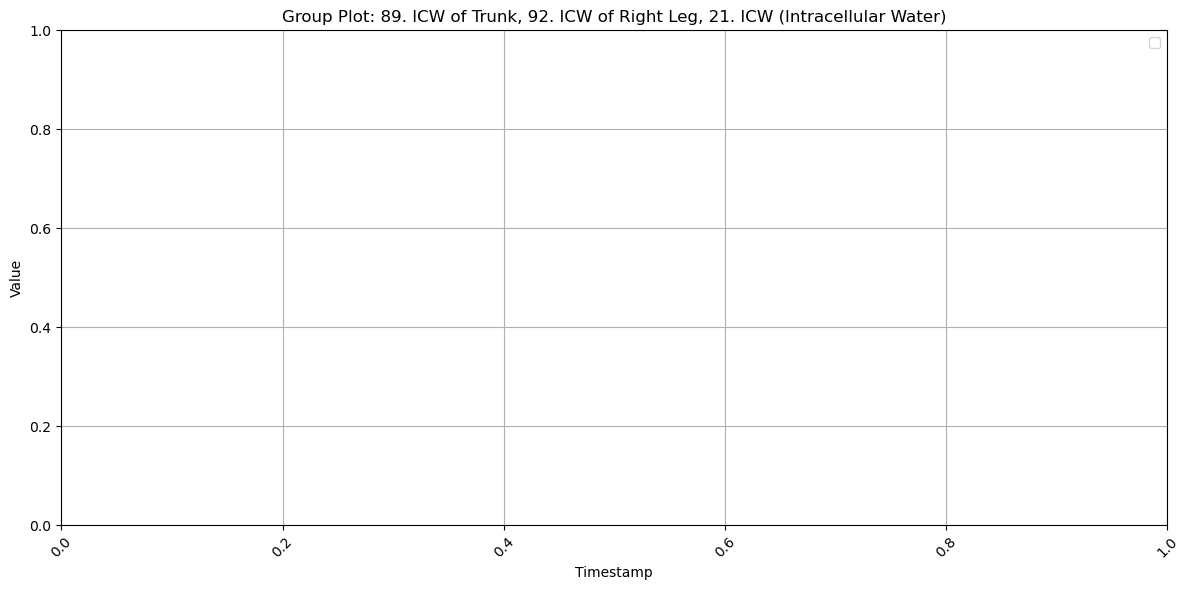

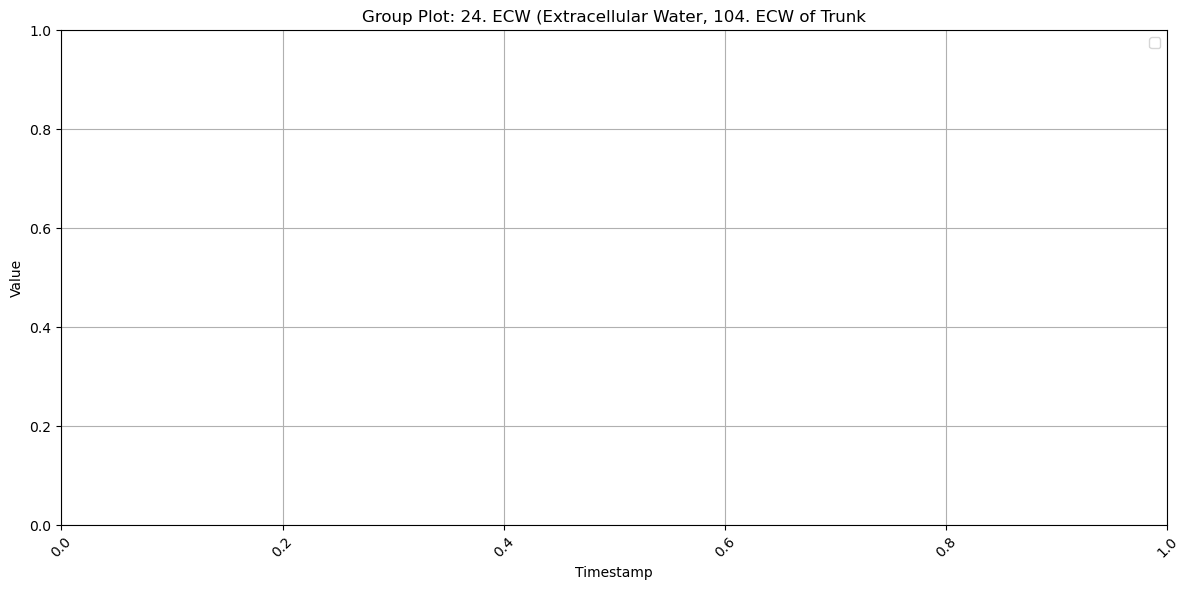

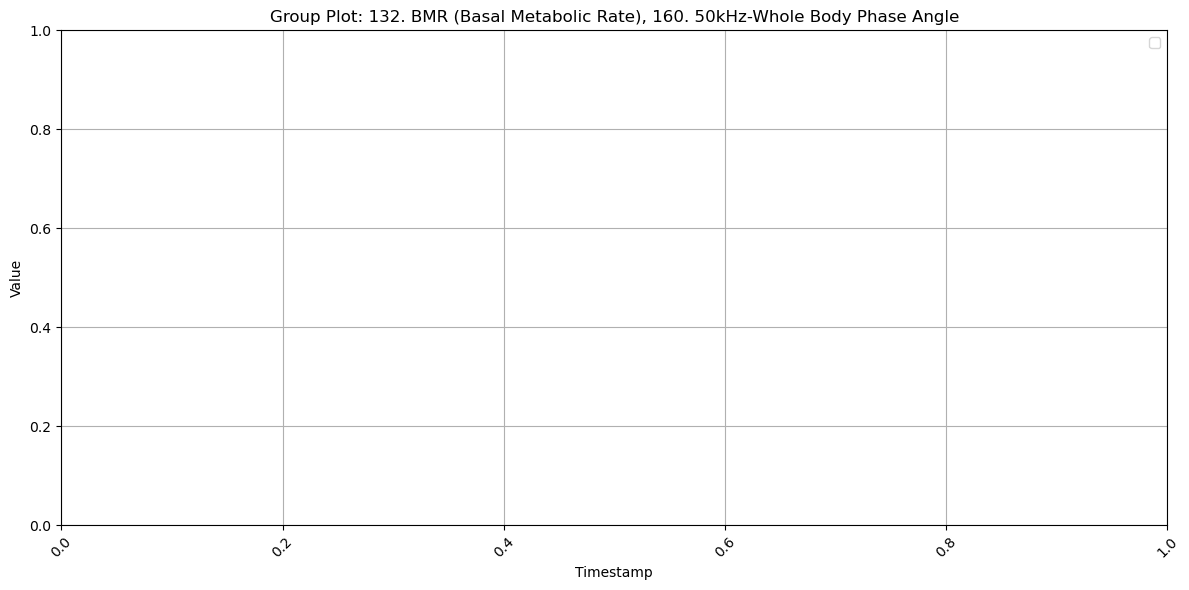

In [24]:
plot_column_groups(ib970mrn_grp1_nrml, plt_grps)

### Single Not operational

In [25]:
# Show ib970mrn_grp1_nrml
#ib970mrn_grp1_nrml

## **Plot_all_columns_over_time(ib970mrn_grp1)** 

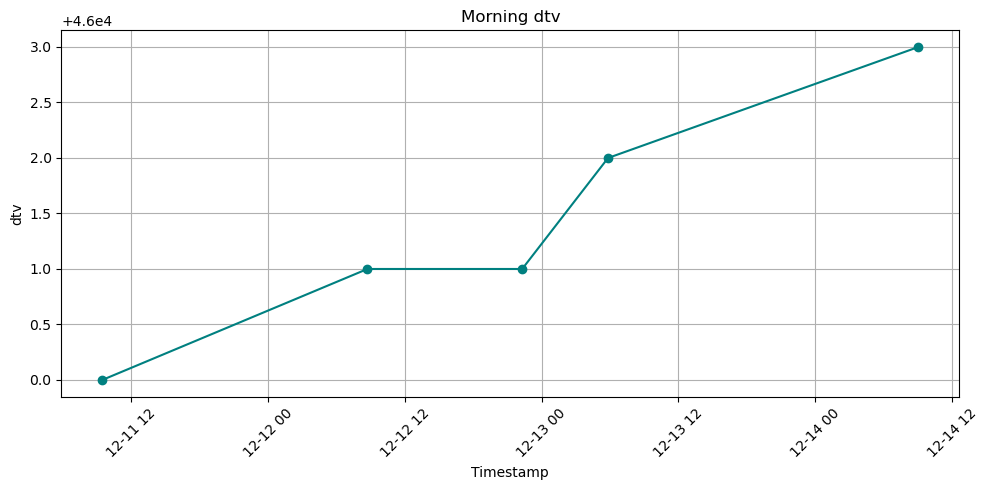

In [26]:
plot_all_columns_over_time(ib970mrn_grp1)

## **Plot_all_"normalized" columns_over_time(ib970mrn_grp1_nrmlzd)** 

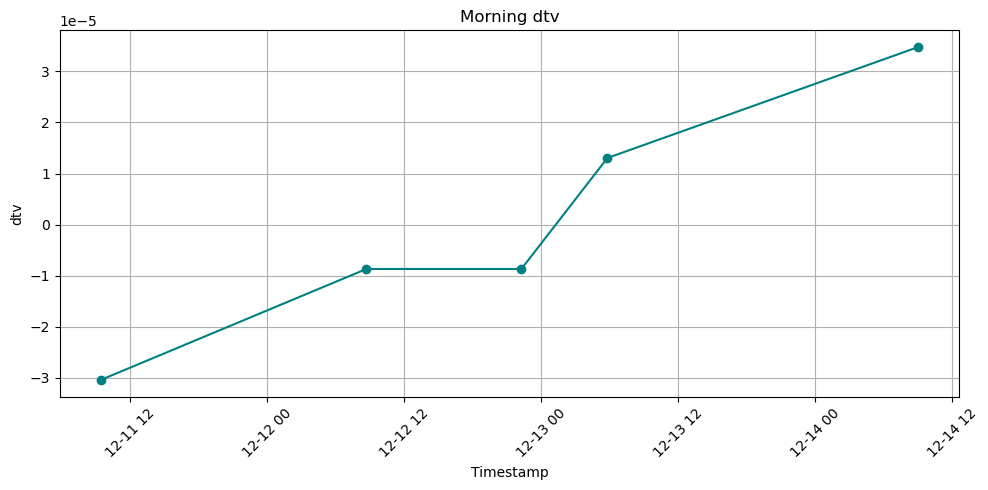

In [27]:
plot_all_columns_over_time(ib970mrn_grp1_nrml)

In [28]:
print("all plot printed for ib970mrn_grp1_nrmlz")

all plot printed for ib970mrn_grp1_nrmlz
